In [1]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense,LSTM
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
vocab_size=14031
#단어 집합의 크기: 14031

In [3]:
import numpy as np
import pandas as pd
x_data=np.load('../Data_Ready/data/X_data.npy')
y_data=pd.read_csv('../Data_Ready/data/y_data.csv')

In [4]:
y_data=np.asarray(y_data)
from keras.utils import to_categorical
y_data=to_categorical(y_data)

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import KFold

kf=KFold(7)
for train_index,test_index in kf.split(x_data):
    X_train,X_test=x_data[train_index],x_data[test_index]
    Y_train,Y_test=y_data[train_index],y_data[test_index]

In [6]:
# train_c=int(len(x_data)*0.8)
# test_c=int(len(x_data)-train_c)
# print('훈련데이터 개수 :',train_c)
# print('테스트 데이터 개수 :',test_c)
# X_train=x_data[:train_c]
# Y_train=y_data[:train_c]
# X_test=x_data[train_c:]
# Y_test=y_data[train_c:]

In [7]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

943
943
157
157


In [8]:
Y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [9]:
model=Sequential()
model.add(Embedding(vocab_size,16))
model.add(LSTM(16))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history=model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 754 samples, validate on 189 samples
Epoch 1/10
754/754 [==============================] - 12s 16ms/step - loss: 1.0940 - acc: 0.4218 - val_loss: 1.0875 - val_acc: 0.5291
Epoch 2/10
754/754 [==============================] - 9s 11ms/step - loss: 1.0715 - acc: 0.5623 - val_loss: 1.0587 - val_acc: 0.4550
Epoch 3/10
754/754 [==============================] - 9s 11ms/step - loss: 0.9879 - acc: 0.6008 - val_loss: 0.9586 - val_acc: 0.5556
Epoch 4/10
754/754 [==============================] - 8s 11ms/step - loss: 0.7857 - acc: 0.6286 - val_loss: 0.9541 - val_acc: 0.5608
Epoch 5/10
754/754 [==============================] - 11s 15ms/step - loss: 0.6199 - acc: 0.7056 - val_loss: 0.8478 - val_acc: 0.5979
Epoch 6/10
754/754 [==============================] - 11s 15ms/step - loss: 0.4842 - acc: 0.8024 - val_loss: 0.9761 - val_acc: 0.5238
Epoch 7/10
754/754 [==============================] - 11s 15ms/step - loss: 0.3892 - acc: 0.8806 - val_loss: 0.9004 - val_acc: 0.5767
Epoch 8/10
754/754 

In [10]:
print('\n 테스트 정확도: %.4f'%(model.evaluate(X_test,Y_test)[1]))

157/157 [==============================] - 1s 3ms/step

 테스트 정확도: 0.5414


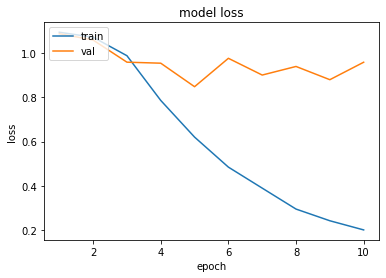

In [11]:
import matplotlib.pyplot as plt
epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()